# 1. Loading im.db as pd.df

In [1]:
import pandas as pd
import sqlite3

In [60]:
import numpy as np
from scipy.stats import linregress

In [2]:
conn = sqlite3.connect('data/im.db')
cursor = conn.cursor()

In [3]:
imdb_basics = pd.read_sql('''
SELECT *
FROM movie_basics
''', conn)

imdb_akas = pd.read_sql('''
SELECT *
FROM movie_akas
''', conn)

imdb_ratings = pd.read_sql('''
SELECT *
FROM movie_ratings
''', conn)

imdb_principals = pd.read_sql('''
SELECT *
FROM principals
''', conn)

known_known_for = pd.read_sql('''
SELECT *
FROM known_for
''', conn)

imdb_directors = pd.read_sql('''
SELECT *
FROM directors
''', conn)

imdb_writers = pd.read_sql('''
SELECT *
FROM writers
''', conn)

imdb_persons = pd.read_sql('''
SELECT *
FROM persons
''', conn)

# 2. Name of df Variables:

### imdb Variables (each variable is an individual table):
- imdb_basics
- imdb_akas
- imdb_ratings
- imdb_principals
- known_known_for
- imdb_directors
- imdb_writers
- imdb_persons

# 3. Exploring IMDB df's:

### 3a. Exploring: movie_akas_imdb

In [29]:
#movie_akas_imdb.info()

#### ordering = 1 has the same length as indivitual movie_id's be the same length as unique movie_id

In [4]:
imdb_akas = pd.read_sql('''
SELECT *
FROM movie_akas
WHERE region = 'US'
GROUP BY movie_id
''', conn)
imdb_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47433 entries, 0 to 47432
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           47433 non-null  object 
 1   ordering           47433 non-null  int64  
 2   title              47433 non-null  object 
 3   region             47433 non-null  object 
 4   language           325 non-null    object 
 5   types              4977 non-null   object 
 6   attributes         1652 non-null   object 
 7   is_original_title  47428 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 2.9+ MB


In [ ]:
#imdb_akas['movie_id'].value_counts()

In [ ]:
len(imdb_akas['movie_id'].unique())

In [ ]:
#imdb_akas.loc[m_akas_us['movie_id'] == 'tt2488496']

### 3b. Exploring: movie_akas_imdb

In [ ]:
#movie_basics_imdb.info()

In [ ]:
#movie_basics_imdb['movie_id'].value_counts()

In [5]:
akas_basics_merge = imdb_akas.merge(imdb_basics, on='movie_id',
                                        how='inner')
imdb_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [ ]:
akas_basics_merge['movie_id'].value_counts()

### 3c. Explored: movie_rat_imdb

In [6]:
#movie_rat_imdb.info()

 # 3d. Combining IMDB database

In [6]:
imdb_merged = akas_basics_merge.merge(imdb_ratings, on='movie_id',
                                       how='left')
imdb_merged

,movie_id,ordering,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0069049,2,The Other Side of the Wind,US,None,imdbDisplay,None,0.0,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
1,tt0112502,1,Bigfoot,US,None,None,None,0.0,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32.0
2,tt0159369,3,Cooper and Hemingway: The True Gen,US,None,None,None,0.0,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53.0
3,tt0192528,1,Heaven & Hell,US,None,imdbDisplay,None,0.0,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72.0
4,tt0230212,1,The Final Journey,US,None,None,None,0.0,The Final Journey,The Final Journey,2010,120.0,Drama,8.8,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47428,tt9837530,2,Monkey King Reloaded,US,None,None,None,0.0,Monkey King Reloaded,Monkey King Reloaded,2017,77.0,Adventure,NaN,NaN
47429,tt9845398,2,End of the Century,US,None,imdbDisplay,None,0.0,End of the Century,Fin de siglo,2019,84.0,Drama,7.2,21.0
47430,tt9875852,2,The House Elf,US,None,imdbDisplay,None,0.0,The House Elf,Domovoy,2019,90.0,"Comedy,Family,Fantasy",5.8,50.0
47431,tt9882084,3,Chasing Happiness,US,None,imdbDisplay,None,0.0,Chasing Happiness,Chasing Happiness,2019,96.0,Documentary,8.1,632.0


In [168]:
#imdb_merged.info()

In [169]:
#imdb_merged.drop(['language', 'attributes', 'types'], axis=1, inplace=True)

In [54]:
imdb_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47433 entries, 0 to 47432
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movie_id             47433 non-null  object 
 1   ordering_x           47433 non-null  int64  
 2   title_x              47433 non-null  object 
 3   region_x             47433 non-null  object 
 4   language_x           325 non-null    object 
 5   types_x              4977 non-null   object 
 6   attributes_x         1652 non-null   object 
 7   is_original_title_x  47428 non-null  float64
 8   ordering_y           47433 non-null  int64  
 9   title_y              47433 non-null  object 
 10  region_y             47433 non-null  object 
 11  language_y           325 non-null    object 
 12  types_y              4977 non-null   object 
 13  attributes_y         1652 non-null   object 
 14  is_original_title_y  47428 non-null  float64
 15  averagerating        26654 non-null 

# 4. Loading tn.movie_budgets as pd.df

In [7]:
tn_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')

# 5. Exploring tn_budgets

In [8]:
tn_budgets.drop_duplicates(subset = ['movie'], inplace=True)

In [9]:
tn_budgets.rename(columns = {'movie':'primary_title'}, inplace=True)

In [10]:
tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5698 non-null   int64 
 1   release_date       5698 non-null   object
 2   primary_title      5698 non-null   object
 3   production_budget  5698 non-null   object
 4   domestic_gross     5698 non-null   object
 5   worldwide_gross    5698 non-null   object
dtypes: int64(1), object(5)
memory usage: 311.6+ KB


In [11]:
#Creating new coumn called year that is date.time
tn_budgets['Release_Date_Time'] = pd.to_datetime(tn_budgets['release_date'])
tn_budgets['start_year'] = tn_budgets['Release_Date_Time'].dt.year

# 6: MERGE Merging Budgets to IMDB

#### follow link: https://www.geeksforgeeks.org/how-to-convert-pandas-dataframe-into-sql-in-python/

In [13]:
imdb_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47433 entries, 0 to 47432
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           47433 non-null  object 
 1   ordering           47433 non-null  int64  
 2   title              47433 non-null  object 
 3   region             47433 non-null  object 
 4   language           325 non-null    object 
 5   types              4977 non-null   object 
 6   attributes         1652 non-null   object 
 7   is_original_title  47428 non-null  float64
 8   primary_title      47433 non-null  object 
 9   original_title     47432 non-null  object 
 10  start_year         47433 non-null  int64  
 11  runtime_minutes    39673 non-null  float64
 12  genres             46840 non-null  object 
 13  averagerating      26654 non-null  float64
 14  numvotes           26654 non-null  float64
dtypes: float64(4), int64(2), object(9)
memory usage: 5.8+ MB


In [14]:
imdb_db = imdb_df_copy.merge(tn_budgets, on= ['primary_title','start_year'], how= 'inner')

In [15]:
imdb_db['worldwide_gross'] = imdb_db['worldwide_gross'].str.replace('$','').str.replace(',','').astype(float)
imdb_db['production_budget'] = imdb_db['production_budget'].str.replace('$','').str.replace(',','').astype(float)
imdb_db['domestic_gross'] = imdb_db['domestic_gross'].str.replace('$','').str.replace(',','').astype(float)

In [142]:
imdb_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 0 to 2144
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           2145 non-null   object        
 1   ordering           2145 non-null   int64         
 2   title              2145 non-null   object        
 3   region             2145 non-null   object        
 4   language           37 non-null     object        
 5   types              791 non-null    object        
 6   attributes         137 non-null    object        
 7   is_original_title  2145 non-null   float64       
 8   primary_title      2145 non-null   object        
 9   original_title     2145 non-null   object        
 10  start_year         2145 non-null   int64         
 11  runtime_minutes    2000 non-null   float64       
 12  genres             2138 non-null   object        
 13  averagerating      1857 non-null   float64       
 14  numvotes

In [16]:
imdb_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1326 entries, 0 to 1325
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           1326 non-null   object        
 1   ordering           1326 non-null   int64         
 2   title              1326 non-null   object        
 3   region             1326 non-null   object        
 4   language           23 non-null     object        
 5   types              622 non-null    object        
 6   attributes         117 non-null    object        
 7   is_original_title  1326 non-null   float64       
 8   primary_title      1326 non-null   object        
 9   original_title     1326 non-null   object        
 10  start_year         1326 non-null   int64         
 11  runtime_minutes    1315 non-null   float64       
 12  genres             1326 non-null   object        
 13  averagerating      1305 non-null   float64       
 14  numvotes

# Dropping Tables
- get rid of start_year or release_date
-

# Analysis:
# Sorted by Genre

In [107]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# same as 
# from matplotlib import pyplot as plt

import seaborn as sns

from scipy import stats
from sklearn.datasets import load_iris

In [108]:
imdb_db['genres'].dropna(inplace=True)

In [109]:
imdb_db['worldwide_gross'].dropna(inplace=True)

In [110]:
genre_profit = imdb_db.loc[:,['genres','worldwide_gross']]

In [111]:
genre_profit.dropna(axis = 0, inplace=True)

In [112]:
gen_pro = genre_profit.sort_values('worldwide_gross', ascending=False).head(30)

In [113]:
#gen_pro

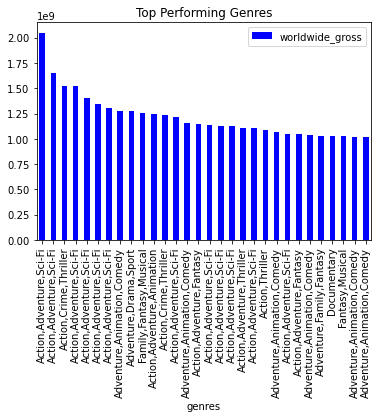

In [114]:
gen_pro.plot(kind = 'bar',
        x = 'genres',
        y = 'worldwide_gross',
        color = 'blue')
  
# set the title
plt.title('Top Performing Genres')
  
# show the plot
plt.show()

In [57]:
imdb_db

,movie_id,ordering,title,region,language,types,attributes,is_original_title,primary_title,original_title,...,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,Release_Date_Time
0,tt0249516,2,Foodfight!,US,None,None,None,0.0,Foodfight!,Foodfight!,...,91.0,"Action,Animation,Comedy",1.9,8248.0,26,"Dec 31, 2012",45000000.0,0.0,7.370600e+04,2012-12-31
1,tt0359950,25,The Secret Life of Walter Mitty,US,None,imdbDisplay,None,0.0,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,...,114.0,"Adventure,Comedy,Drama",7.3,275300.0,37,"Dec 25, 2013",91000000.0,58236838.0,1.878612e+08,2013-12-25
2,tt0365907,20,A Walk Among the Tombstones,US,None,None,None,0.0,A Walk Among the Tombstones,A Walk Among the Tombstones,...,114.0,"Action,Crime,Drama",6.5,105116.0,67,"Sep 19, 2014",28000000.0,26017685.0,6.210859e+07,2014-09-19
3,tt0369610,21,Jurassic World 3D,US,None,None,3-D version,0.0,Jurassic World,Jurassic World,...,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,34,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,2015-06-12
4,tt0376136,16,Hunter S. Thompson's The Rum Diary,US,None,working,None,0.0,The Rum Diary,The Rum Diary,...,119.0,"Comedy,Drama",6.2,94787.0,16,"Oct 28, 2011",45000000.0,13109815.0,2.154473e+07,2011-10-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,tt8155288,16,Happy Death Day 2U,US,None,imdbDisplay,None,0.0,Happy Death Day 2U,Happy Death Day 2U,...,100.0,"Drama,Horror,Mystery",6.3,27462.0,78,"Feb 13, 2019",9000000.0,28051045.0,6.417950e+07,2019-02-13
1322,tt8266310,1,Blinded by the Light,US,None,imdbDisplay,None,0.0,Blinded by the Light,Blinded by the Light,...,117.0,"Biography,Comedy,Drama",6.2,173.0,64,"Aug 14, 2019",15000000.0,0.0,0.000000e+00,2019-08-14
1323,tt8364368,5,Crawl,US,None,imdbDisplay,None,0.0,Crawl,Crawl,...,NaN,"Action,Horror,Thriller",NaN,NaN,16,"Jul 12, 2019",17000000.0,0.0,0.000000e+00,2019-07-12
1324,tt8632862,6,Fahrenheit 11/9,US,None,imdbDisplay,None,0.0,Fahrenheit 11/9,Fahrenheit 11/9,...,128.0,Documentary,6.7,11628.0,29,"Sep 21, 2018",5000000.0,6352306.0,6.653715e+06,2018-09-21


In [56]:
correlation_matrix = imdb_db.corr()
print(correlation_matrix)

                   ordering  is_original_title  start_year  runtime_minutes  \
ordering           1.000000                NaN   -0.005914         0.201813   
is_original_title       NaN                NaN         NaN              NaN   
start_year        -0.005914                NaN    1.000000         0.112996   
runtime_minutes    0.201813                NaN    0.112996         1.000000   
averagerating      0.246503                NaN    0.040333         0.425843   
numvotes           0.306191                NaN   -0.111726         0.467795   
id                -0.016517                NaN    0.027218        -0.003407   
production_budget  0.289593                NaN    0.048864         0.399628   
domestic_gross     0.307968                NaN    0.067613         0.343531   
worldwide_gross    0.296024                NaN    0.075570         0.352332   

                   averagerating  numvotes        id  production_budget  \
ordering                0.246503  0.306191 -0.016517   

# EXTRA CREDIT STUFF (ORDERING BY CAST)

In [51]:
#movie_akas_imdb.loc[movie_akas_imdb['ordering'] == 1]

In [10]:
ordering_df = movie_akas_imdb.loc[movie_akas_imdb['ordering'] == 1]

In [52]:
#ordering_df.info()

In [53]:
#principals_imdb['category']

In [ ]:
principals_imdb = pd.read_sql(''' SELECT * FROM principals ''', conn) principals_imdb.loc[principals_imdb['movie_id'] == 'tt0323808']

In [ ]:
# Ordering = IMDB Top Cast order

I figured it out! It's the order that the 'top cast' shows up on the IMDB page. 

I'm going to stash this for after I make a visualization for Genre. 
Going to see if the 'top cast' 

search google for id = 'tt0323808'

https://www.imdb.com/title/tt0323808/fullcredits?ref_=tt_cl_sm
    
principals_imdb = pd.read_sql('''
SELECT *
FROM principals
''', conn)
principals_imdb.loc[principals_imdb['movie_id'] == 'tt0323808']

In [44]:
imdb_order =pd.read_sql('''
SELECT *, sum(ordering)
FROM principals
WHERE ordering <= 
GROUP BY movie_id
ORDER BY sum(ordering) desc
''', conn)
imdb_order

,movie_id,ordering,person_id,category,job,characters,sum(ordering)
0,tt9916754,10,nm9275317,cinematographer,None,None,55
1,tt9916706,10,nm1432957,actor,None,None,55
2,tt9916622,10,nm9272492,cinematographer,None,None,55
3,tt9916538,10,nm4700236,composer,music director,None,55
4,tt9914828,10,nm10537598,writer,english adaptation,None,55
...,...,...,...,...,...,...,...
143449,tt10007268,1,nm10541649,director,None,None,1
143450,tt10006874,1,nm10211155,director,None,None,1
143451,tt10003990,1,nm9033305,director,None,None,1
143452,tt0187902,1,nm0156955,actor,None,"[""Wong Fei Hung""]",1


In [54]:
#principals_imdb.loc[principals_imdb['ordering'] == 10]

In [55]:
#principals_imdb.loc[principals_imdb['movie_id'] == 'tt0323808']

In [56]:
#principals_imdb['movie_id'].value_counts()